## Figure 4

In [13]:
import sys
import os

# Get the absolute path to the project root (one directory up from notebooks/)
root_path = os.path.abspath("..")
sys.path.append(root_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

from src import Nearest_neighbours as nn
from src import figure_Tools as fT


# needed datasets
df_point = pd.read_pickle("../Data/Point_data.pkl")

### points subset for Fig. 4a 

In [10]:
sub_df = df_point[(df_point["Type"] == "T4") & 
    (df_point['Root_x'].between(-10, 10)) &
    (df_point['Root_y'].between(-10, 10))
]

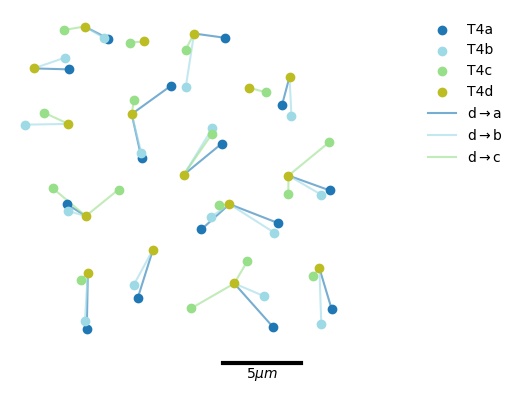

In [23]:
fig, ax  = plt.subplots()

group = 'T4'
# get data arrays
a = sub_df.loc[sub_df.Subtype == group + "a", ["Root_x", "Root_y", "Root_z"]]
b = sub_df.loc[sub_df.Subtype == group + "b", ["Root_x", "Root_y", "Root_z"]]
c = sub_df.loc[sub_df.Subtype == group + "c", ["Root_x", "Root_y", "Root_z"]]
d = sub_df.loc[sub_df.Subtype == group + "d", ["Root_x", "Root_y", "Root_z"]]

# KD Trees - we will just plot "a" subtypes
d_tree = KDTree(d.values)

# d
_, d_a_inds = d_tree.query(a.values, k=1)
_, d_b_inds = d_tree.query(b.values, k=1)
_, d_c_inds = d_tree.query(c.values, k=1)
_, d_d_inds = d_tree.query(d.values, k=[2])

ax.scatter(a.values[:,0], a.values[:,1], c = fT.Subtype_colours[0], label = 'T4a', zorder = 100)
ax.scatter(b.values[:,0], b.values[:,1], c = fT.Subtype_colours[1], label = 'T4b', zorder = 100)
ax.scatter(c.values[:,0], c.values[:,1], c = fT.Subtype_colours[2], label = 'T4c', zorder = 100)
ax.scatter(d.values[:,0], d.values[:,1], c = fT.Subtype_colours[3], label = 'T4d', zorder = 100)

# line alpha
la = 0.6

# coordinates of d subtype roots
coords_d = d.values

starts = coords_d[d_a_inds][:,[0,1]]
stops = a.values[:,[0,1]]
for i in range(len(starts)):
    x1,y1 = starts[i]
    x2,y2 = stops[i]
    if i == 0:
        ax.plot([x1, x2], [y1, y2], color = fT.Subtype_colours[0], label = r"d$\rightarrow$a", alpha = la)
    else:
        ax.plot([x1, x2], [y1, y2], color = fT.Subtype_colours[0], alpha = la)

starts = coords_d[d_b_inds][:,[0,1]]
stops = b.values[:,[0,1]]
for i in range(len(starts)):
    x1,y1 = starts[i]
    x2,y2 = stops[i]
    if i == 0:
        ax.plot([x1, x2], [y1, y2], color = fT.Subtype_colours[1], label = r"d$\rightarrow$b", alpha = la)
    else:
        ax.plot([x1, x2], [y1, y2], color = fT.Subtype_colours[1], alpha = la)

starts = coords_d[d_c_inds][:,[0,1]]
stops = c.values[:,[0,1]]
for i in range(len(starts)):
    x1,y1 = starts[i]
    x2,y2 = stops[i]
    if i == 0:
        ax.plot([x1, x2], [y1, y2], color = fT.Subtype_colours[2], label = r"d$\rightarrow$c", alpha = la)
    else:
        ax.plot([x1, x2], [y1, y2], color = fT.Subtype_colours[2], alpha = la)

ax.plot([3,8],[-12,-12], c = 'k', lw = 3)

ax.legend(frameon = False, loc = 'upper right', bbox_to_anchor = (1.5,1))
ax.set_aspect("equal")
ax.axis("off")

ax.text(5.5,-13,"$5\mu m$", ha = "center");

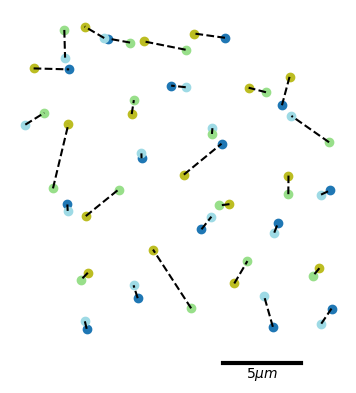

In [22]:
fig, ax = plt.subplots()

coords = sub_df[['Root_x','Root_y','Root_z']].values
pairs, dists, assignment = nn.find_optimal_assignment(coords = coords)

# plot points again
# get data arrays
a = sub_df.loc[sub_df.Subtype == group + "a", ["Root_x", "Root_y", "Root_z"]]
b = sub_df.loc[sub_df.Subtype == group + "b", ["Root_x", "Root_y", "Root_z"]]
c = sub_df.loc[sub_df.Subtype == group + "c", ["Root_x", "Root_y", "Root_z"]]
d = sub_df.loc[sub_df.Subtype == group + "d", ["Root_x", "Root_y", "Root_z"]]
ax.scatter(a.values[:,0], a.values[:,1], c = fT.Subtype_colours[0])
ax.scatter(b.values[:,0], b.values[:,1], c = fT.Subtype_colours[1])
ax.scatter(c.values[:,0], c.values[:,1], c = fT.Subtype_colours[2])
ax.scatter(d.values[:,0], d.values[:,1], c = fT.Subtype_colours[3])


for i in range(len(pairs)):
    p = pairs[i]
    c = coords[[*p]]
    if i == 0:
        ax.plot(c[:,0], c[:,1], color = 'k', ls = '--', zorder = 100, label = 'Global nearest \nneighbour')
    else:
        ax.plot(c[:,0], c[:,1], color = 'k', ls = '--', zorder = 100)
ax.plot([3,8],[-12,-12], c = 'k', lw = 3)

# ax.legend(frameon = False, loc = 'lower left', bbox_to_anchor = (-0.7,0))
ax.set_aspect('equal')
ax.axis('off')

ax.text(5.5,-13,"$5\mu m$", ha = "center");

### Figure 4b i

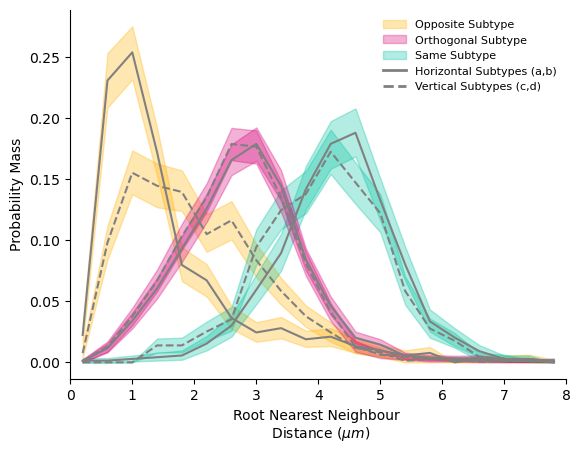

In [2]:
fig, ax = plt.subplots()

nn.nn_PMFs(ax = ax,
           group = 'T4',
           df = df_point,
           x0 = 0,
           x1 = 8,
           n_bins = 20,
           n_boots = 1000)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Probability Mass")
ax.set_xlabel("Root Nearest Neighbour \n Distance $(\mu m)$");

### Figure 4b ii

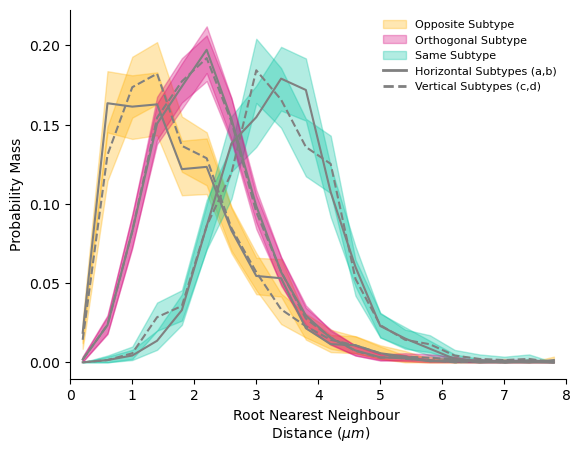

In [3]:
fig, ax = plt.subplots()

nn.nn_PMFs(ax = ax,
           group = 'T5',
           df = df_point,
           x0 = 0,
           x1 = 8,
           n_bins = 20,
           n_boots = 1000)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Probability Mass")
ax.set_xlabel("Root Nearest Neighbour \n Distance $(\mu m)$");

### get unique nearest neighbour pairings

This takes a wee bit of time...

In [4]:
T4_coords = df_point.loc[df_point.Type == 'T4',['Root_x','Root_y','Root_z']].values
T4_labels = df_point.loc[df_point.Type == 'T4','Subtype'].str[-1].values.astype(str)
T4_pairs, T4_distances, T4_assignments = nn.find_optimal_assignment(T4_coords)

T5_coords = df_point.loc[df_point.Type == 'T5',['Root_x','Root_y','Root_z']].values
T5_labels = df_point.loc[df_point.Type == 'T5','Subtype'].str[-1].values.astype(str)
T5_pairs, T5_distances, T5_assignments = nn.find_optimal_assignment(T5_coords)


### Figure 4c i

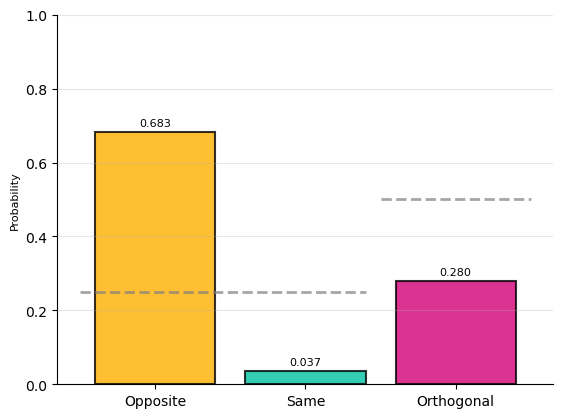

In [5]:
fig, ax = plt.subplots()


nn.plot_classification_probabilities(ax, pairs = T4_pairs, groups = T4_labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Figure 4c ii

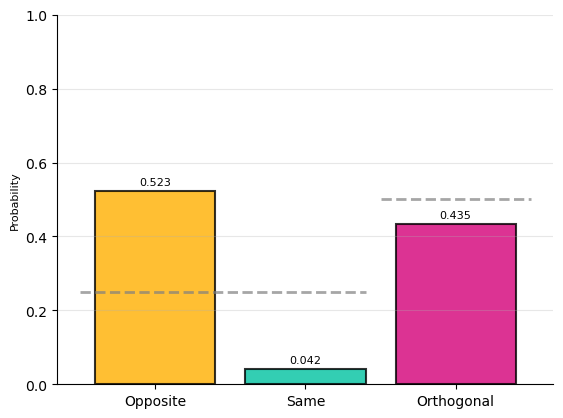

In [6]:
fig, ax = plt.subplots()


nn.plot_classification_probabilities(ax, pairs = T5_pairs, groups = T5_labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Figure 4d i

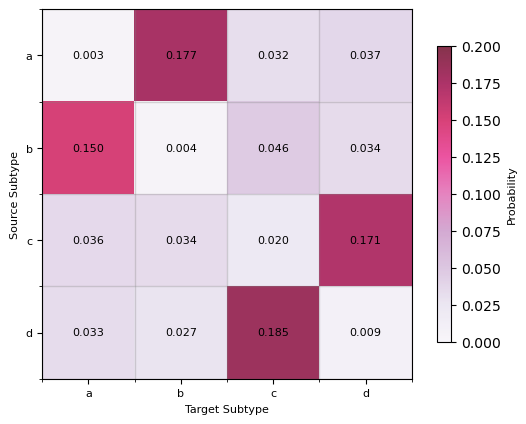

In [7]:
fig, ax = plt.subplots()

nn.plot_group_pair_probability_matrix(ax = ax, pairs = T4_pairs, groups = T4_labels, x1 = 0.2);
ax.set_xlabel('Target Subtype');
ax.set_ylabel('Source Subtype');

### Figure 4d ii

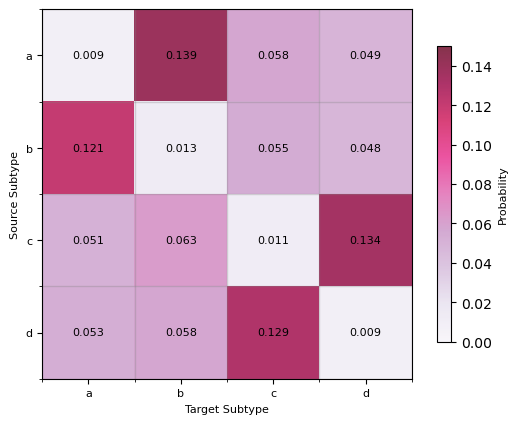

In [9]:
fig, ax = plt.subplots()

nn.plot_group_pair_probability_matrix(ax = ax, pairs = T5_pairs, groups = T5_labels, x1 = 0.15);
ax.set_xlabel('Target Subtype');
ax.set_ylabel('Source Subtype');